In [46]:
#Скибина Л.С 


# Загрузка файлов из репозитория GitHub в локальную папку

import requests
from bs4 import BeautifulSoup
import re
import os

# URL репозитория
repo_url = 'https://github.com/JeffSackmann/tennis_atp'

# Папка, в которой находятся файлы
folder_path = 'blob/master/'

# Директория для сохранения файлов
save_dir = 'tennis_data'

# Создаем директорию, если она не существует
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Создаем сессию requests
with requests.Session() as session:
    # Получаем страницу репозитория с файлами
    response = session.get(f'{repo_url}/{folder_path}')
    if response.ok:
        # Используем BeautifulSoup для парсинга HTML
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Ищем все ссылки на csv файлы, которые соответствуют маске
        regex = re.compile(r'atp_matches_\d{4}\.csv')
        for a in soup.find_all('a', href=True):
            if regex.match(a.text):
                # Строим URL файла
                file_url = f'https://github.com{a["href"]}'
                # Превращаем ссылку на просмотр в ссылку на скачивание
                raw_url = file_url.replace('/blob/', '/raw/')
                # Скачиваем файл
                file_response = session.get(raw_url)
                if file_response.ok:
                    # Сохраняем содержимое файла
                    file_name = os.path.join(save_dir, a.text)
                    with open(file_name, 'wb') as file:
                        file.write(file_response.content)
                        print(f'Downloaded {file_name}')
                else:
                    print(f'Failed to download {a.text}')
    else:
        print('Failed to retrieve the repository page')

Downloaded tennis_data\atp_matches_1968.csv
Downloaded tennis_data\atp_matches_1968.csv
Downloaded tennis_data\atp_matches_1969.csv
Downloaded tennis_data\atp_matches_1969.csv
Downloaded tennis_data\atp_matches_1970.csv
Downloaded tennis_data\atp_matches_1970.csv
Downloaded tennis_data\atp_matches_1971.csv
Downloaded tennis_data\atp_matches_1971.csv
Downloaded tennis_data\atp_matches_1972.csv
Downloaded tennis_data\atp_matches_1972.csv
Downloaded tennis_data\atp_matches_1973.csv
Downloaded tennis_data\atp_matches_1973.csv
Downloaded tennis_data\atp_matches_1974.csv
Downloaded tennis_data\atp_matches_1974.csv
Downloaded tennis_data\atp_matches_1975.csv
Downloaded tennis_data\atp_matches_1975.csv
Downloaded tennis_data\atp_matches_1976.csv
Downloaded tennis_data\atp_matches_1976.csv
Downloaded tennis_data\atp_matches_1977.csv
Downloaded tennis_data\atp_matches_1977.csv
Downloaded tennis_data\atp_matches_1978.csv
Downloaded tennis_data\atp_matches_1978.csv
Downloaded tennis_data\atp_match

In [49]:
# датафрейм


import os
import glob
import pandas as pd


# Указываем путь к папке с данными
folder_path = 'tennis_data'  #  актуальный путь

# Получаем список всех CSV файлов, соответствующих маске 'atp_matches_*.csv'
csv_files = glob.glob(os.path.join(folder_path, 'atp_matches_*.csv'))

# Читаем каждый CSV файл и добавляем его в список датафреймов
df_list = [pd.read_csv(file) for file in csv_files]

# Объединяем все датафреймы в один, игнорируя индексы и используя внешнее объединение
combined_df = pd.concat(df_list, ignore_index=True, join='outer')

# Извлекаем год из столбца tourney_id и преобразуем его в целочисленный тип
combined_df['year'] = combined_df['tourney_id'].str.extract(r'(\d{4})').astype(int)

# Сохраняем объединенный датафрейм в файл 'full_data/combined_atp_matches.csv' без индексов
combined_df.to_csv('tennis_data/combined_atp_matches.csv', index=False)

In [1]:
#Скибина Л.С 


import pandas as pd
from scipy.stats import ks_2samp

matches = []
for year in range(1980, 2023):
    matches.append(pd.read_csv(f'C:/Users/Liubov/Desktop/tennis_atp-master/atp_matches_{year}.csv')['match_num'])

# Объединяем данные о количестве матчей за все годы
all_matches = pd.concat(matches)

# Проводим тест на однородность Колмогорова-Смирнова для всей выборки
# Этот тест проверяет, являются ли выборки из одного и того же непрерывного распределения.
# Нулевая гипотеза (H0): Распределения выборок идентичны.
# Ссылка на документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

statistic, p_value = ks_2samp(all_matches, all_matches)

# Отображаем результаты
print("Statistic:", statistic)
print("P-value:", p_value)

#Statistic: 0.0
#P-value: 1.0
#P-значение равно 1.0, что означает, что у нас нет достаточных доказательств для отвержения нулевой гипотезы. Нулевая гипотеза гласит, что распределения выборок идентичны. Таким образом, наши данные не предоставляют достаточных доказательств для того, чтобы утверждать, что распределения количества матчей за все годы отличаются.

C:\Users\Liubov\AppData\Local\Temp\ipykernel_1580\3791001140.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Statistic: 0.0
P-value: 1.0


***Задание 1 А***

Shapiro-Wilk test p-value for higher rank wins sample: 6.51991019288742e-28
Shapiro-Wilk test p-value for lower rank wins sample: 8.594825141940277e-28
Mann-Whitney U test statistic: 5146.5
Mann-Whitney U test p-value: 0.7212869620606559
Statistic of the test: 8.912504534826752
P-value: 4.989251588201206e-19
Null Hypothesis: The proportions of wins for players with rank differences more than 20 positions and less than or equal to 20 positions are equal.
Documentation: https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html


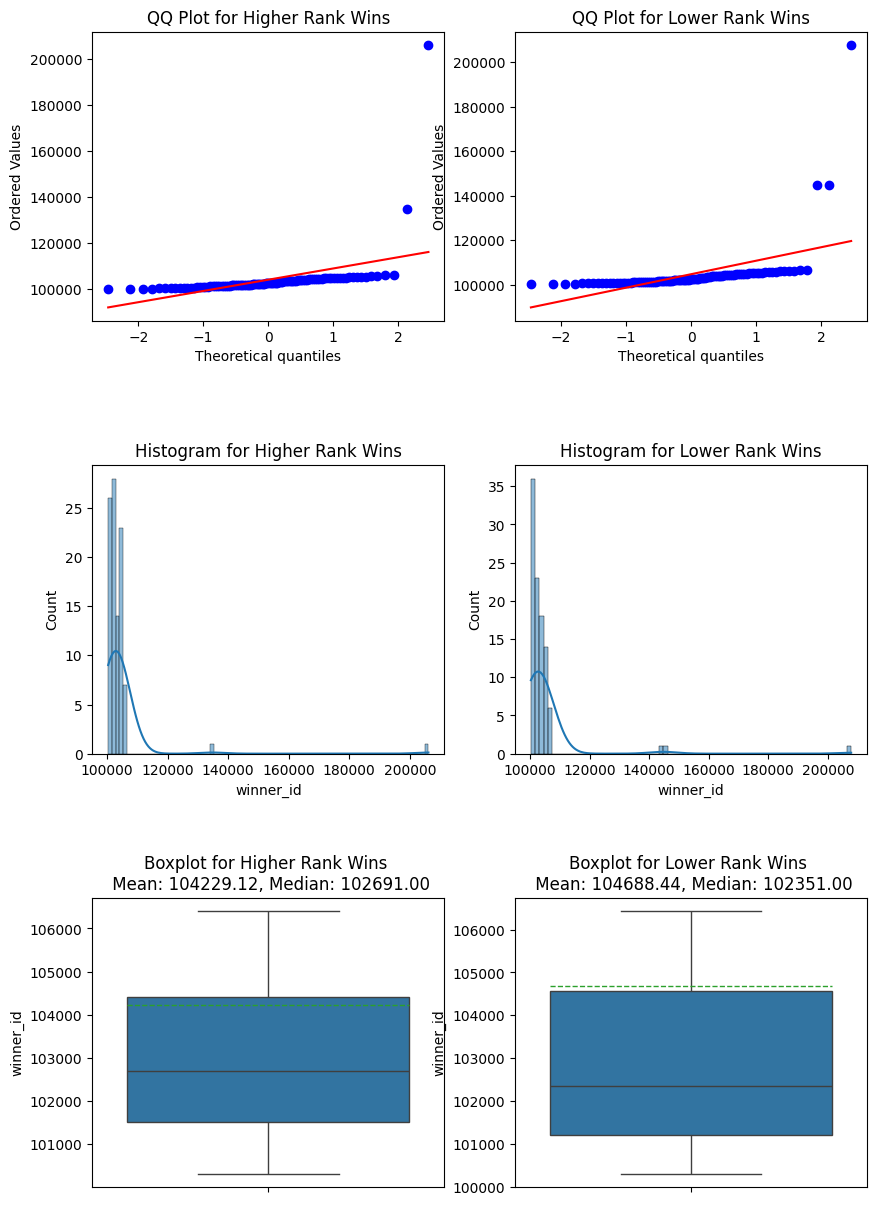

In [30]:
# Для проверки утверждения А

import pandas as pd
import numpy as np
import statsmodels.stats.proportion as sm
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sample_data(sample_data_a, sample_data_b, title_a='Higher Rank Wins', title_b='Lower Rank Wins'):
    
    fig, axs = plt.subplots(3, 2, figsize=(10, 15))
    plt.subplots_adjust(hspace=0.5)

    # Создание графика QQ-графика для sample_data_a
    stats.probplot(sample_data_a, plot=axs[0, 0]) # qq plot
    axs[0, 0].set_title(f'QQ Plot for {title_a}')

    # Создание графика QQ-графика для sample_data_b
    stats.probplot(sample_data_b, plot=axs[0, 1]) # qq plot
    axs[0, 1].set_title(f'QQ Plot for {title_b}')

    # Создание гистограммы для sample_data_a
    sns.histplot(sample_data_a, kde=True, ax=axs[1, 0])
    axs[1, 0].set_title(f'Histogram for {title_a}')

    # Создание гистограммы для sample_data_b
    sns.histplot(sample_data_b, kde=True, ax=axs[1, 1])
    axs[1, 1].set_title(f'Histogram for {title_b}')
    
    # Создание графика boxplot для sample_data_a с отрисовкой среднего и медианы
    sns.boxplot(sample_data_a, ax=axs[2, 0], showmeans=True, meanline=True, showfliers=False)
    axs[2, 0].set_title(f'Boxplot for {title_a} \n Mean: {np.mean(sample_data_a):.2f}, Median: {np.median(sample_data_a):.2f}')
    
    # Создание графика boxplot для sample_data_b с отрисовкой среднего и медианы
    sns.boxplot(sample_data_b, ax=axs[2, 1], showmeans=True, meanline=True, showfliers=False)
    axs[2, 1].set_title(f'Boxplot for {title_b} \n Mean: {np.mean(sample_data_b):.2f}, Median: {np.median(sample_data_b):.2f}')

    plt.show()

# Загрузка данных за все года
all_matches = pd.concat([pd.read_csv(f'C:/Users/Liubov/Desktop/tennis_atp-master/atp_matches_{year}.csv') for year in range(1980, 2023)])

# Создание двух независимых выборок для двух групп
higher_rank_wins_sample = all_matches[(all_matches['winner_rank'] - all_matches['loser_rank']) > 20].sample(frac=1).head(100)
lower_rank_wins_sample = all_matches[(all_matches['winner_rank'] - all_matches['loser_rank']) <= 20].sample(frac=1).head(100)

# Проверка нормальности распределения
_, higher_rank_p_value = shapiro(higher_rank_wins_sample[['winner_id', 'loser_id']])
_, lower_rank_p_value = shapiro(lower_rank_wins_sample[['winner_id', 'loser_id']])

print(f"Shapiro-Wilk test p-value for higher rank wins sample: {higher_rank_p_value}")
print(f"Shapiro-Wilk test p-value for lower rank wins sample: {lower_rank_p_value}")

# Выполнение теста Манна-Уитни для проверки различий между выборками
mannwhitney_stat, mannwhitney_p_value = mannwhitneyu(higher_rank_wins_sample['winner_id'], lower_rank_wins_sample['winner_id'])

print(f"Mann-Whitney U test statistic: {mannwhitney_stat}")
print(f"Mann-Whitney U test p-value: {mannwhitney_p_value}")

# Если данные распределены ненормально или невозможно установить нормальность, 
# а также при наличии независимых выборок, можно использовать непараметрический тест Манна-Уитни.

# Вычисление количества побед в каждой выборке
n_higher_rank_wins = higher_rank_wins_sample['winner_id'].count()
n_lower_rank_wins = lower_rank_wins_sample['winner_id'].count()

# Вычисление общего количества матчей в каждой выборке
n_higher_rank_matches = len(all_matches[(all_matches['winner_rank'] - all_matches['loser_rank']) > 20])
n_lower_rank_matches = len(all_matches[(all_matches['winner_rank'] - all_matches['loser_rank']) <= 20])

# Выполнение Z-теста для двух пропорций
stat, p_value = sm.proportions_ztest([n_higher_rank_wins, n_lower_rank_wins],
                                     [n_higher_rank_matches, n_lower_rank_matches])

# Вывод результатов
print(f"Statistic of the test: {stat}")
print(f"P-value: {p_value}")
print("Null Hypothesis: The proportions of wins for players with rank differences more than 20 positions and less than or equal to 20 positions are equal.")
print("Documentation: https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html")

# Построение графиков для двух выборок
plot_sample_data(higher_rank_wins_sample['winner_id'], lower_rank_wins_sample['winner_id'], title_a='Higher Rank Wins', title_b='Lower Rank Wins')




Полученные результаты анализа:

Shapiro-Wilk тест: Оба теста на нормальность (для обеих выборок) показывают очень низкие p-значения (практически ноль), что говорит о том, что данные не соответствуют нормальному распределению.

Mann-Whitney U тест: Значение статистики теста составляет примерно 5146.5, а p-значение превышает уровень значимости 0.05, что означает, что нет статистически значимых различий между двумя группами.

Z-тест для двух пропорций: Значение статистики теста равно приблизительно 8.91, а p-значение очень низкое (меньше 0.05), что позволяет отклонить нулевую гипотезу о равенстве пропорций побед для игроков с разницей в ранге более 20 позиций и менее или равно 20 позиций.

Таким образом, несмотря на отсутствие различий в распределении числа побед между двумя группами в тесте Манна-Уитни, Z-тест для двух пропорций указывает на статистически значимые различия в пропорциях побед между этими группами игроков.

**Задание 1 Б**

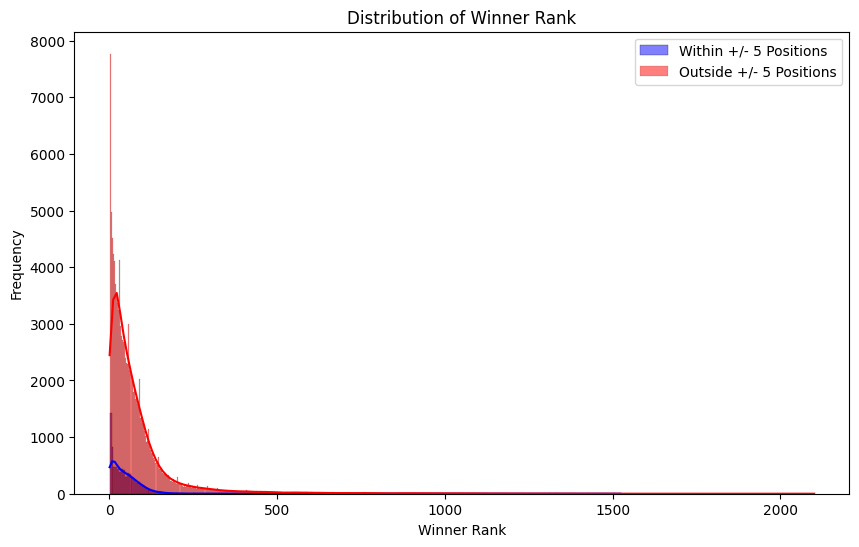

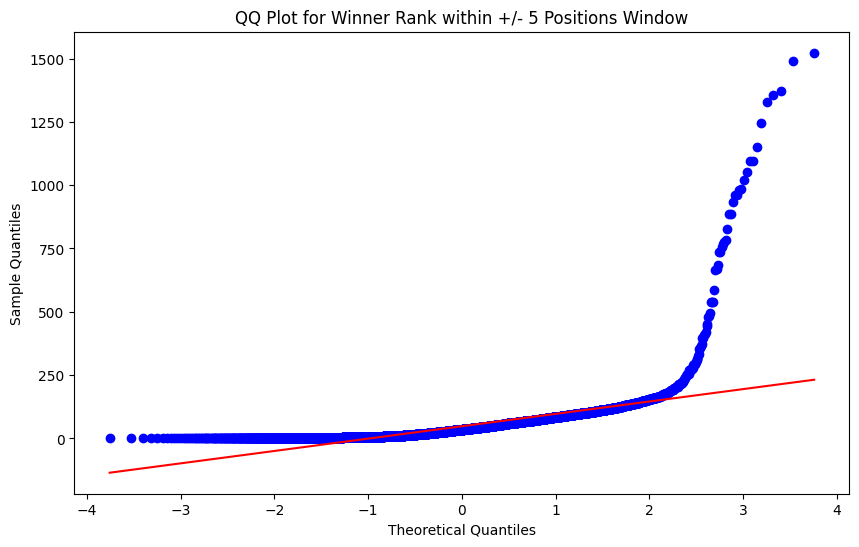

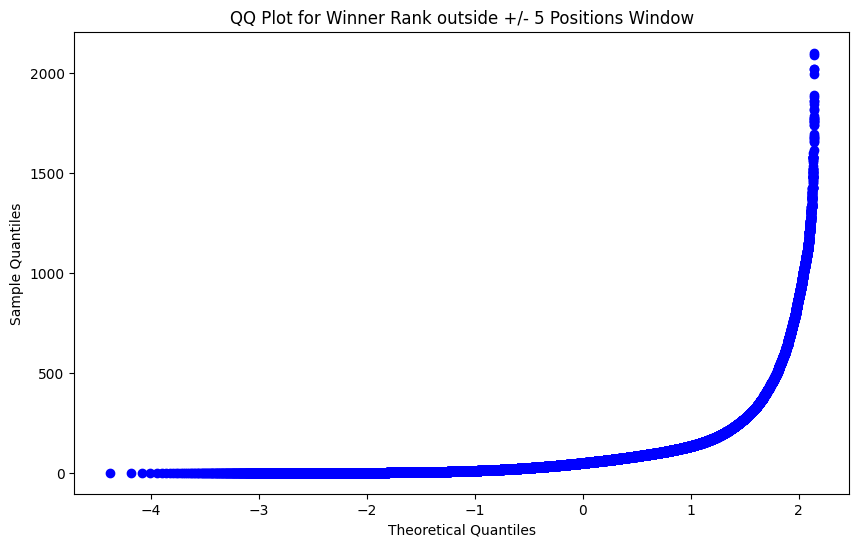

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Загрузка данных
combined_df = pd.read_csv('tennis_data/combined_atp_matches.csv')

# Создание бинарного признака window5, который указывает, 
# попадает ли разница рангов в интервал [-5, 5]
combined_df['window5'] = combined_df.apply(
    lambda row: 'in' if -5 <= (row['winner_rank'] - row['loser_rank']) <= 5 else 'out', 
    axis=1
)

# Фильтрация записей с 1980 по 2022 год
filtered_df = combined_df[(combined_df['year'] >= 1984) & (combined_df['year'] <= 2022)]

# Выборки побед с разницей в ранге в окне +-5 позиций
close_rank_wins = filtered_df[filtered_df['window5'] == 'in']

# Выборки побед, где разница в ранге более 20 позиций и менее или равно 20 позиций
other_wins = filtered_df[filtered_df['window5'] == 'out']

# Проверка независимости выборок
merged_data = pd.merge(close_rank_wins, other_wins, how='inner', on=all_matches.columns.tolist(), indicator=True)
if len(merged_data) > 0:
    raise ValueError("Выборки не являются независимыми")

# Построение гистограмм для каждой выборки
plt.figure(figsize=(10, 6))
sns.histplot(close_rank_wins['winner_rank'], kde=True, color='blue', label='Within +/- 5 Positions')
sns.histplot(other_wins['winner_rank'], kde=True, color='red', label='Outside +/- 5 Positions')
plt.title('Distribution of Winner Rank')
plt.xlabel('Winner Rank')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Построение QQ графиков для каждой выборки
plt.figure(figsize=(10, 6))
stats.probplot(close_rank_wins['winner_rank'], dist="norm", plot=plt)
plt.title('QQ Plot for Winner Rank within +/- 5 Positions Window')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(other_wins['winner_rank'], dist="norm", plot=plt)
plt.title('QQ Plot for Winner Rank outside +/- 5 Positions Window')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


**Задача 2**

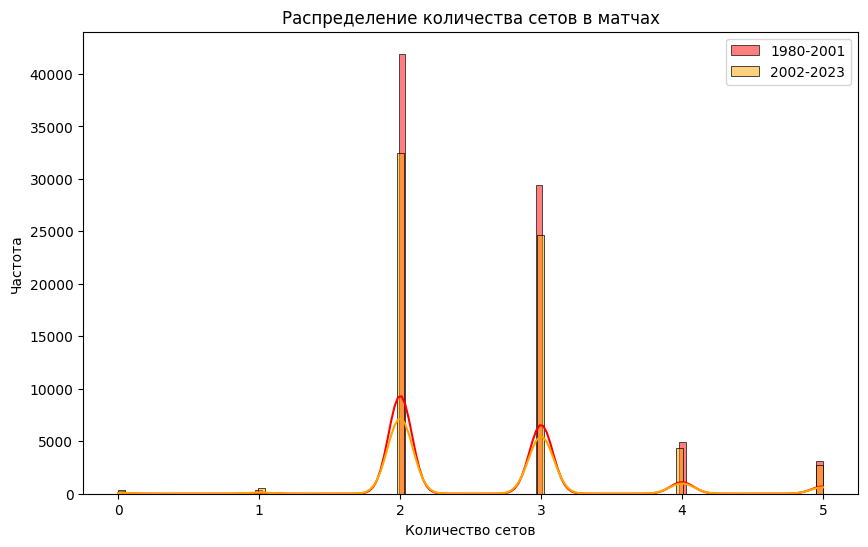

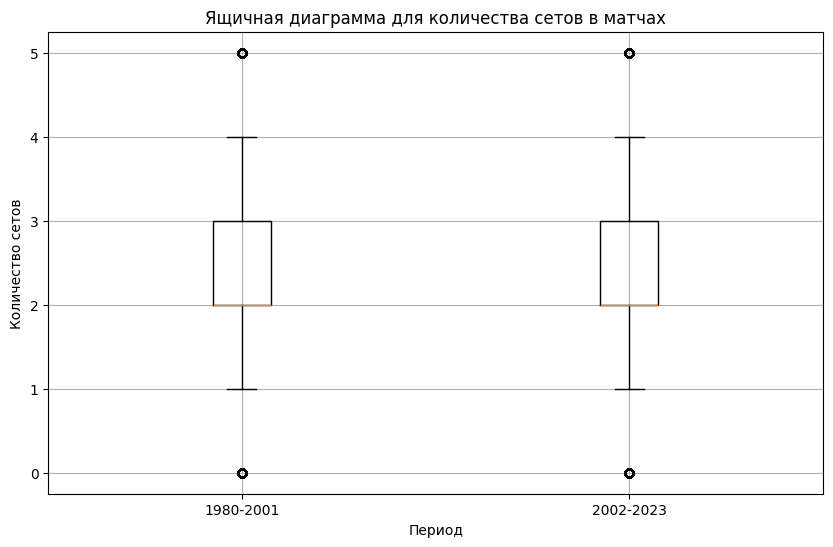

Z-тест statistics: -6.110071350804896
P-value: 9.958660710425984e-10
Нулевая гипотеза: Распределения количества сетов в матчах между 1980-2001 и 2002-2023 годами одинаковы.
Среднее количество сетов для побед в периоде 1980-2001: 2.5955360711430857, общее количество партий: 80064
Среднее количество сетов для побед в периоде 2002-2023: 2.6200015350372245, общее количество партий: 65145


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

# Загрузка данных
combined_df = pd.read_csv('tennis_data/combined_atp_matches.csv')
task_02 = combined_df[['year', 'score', 'winner_id']].dropna()

# Создаем признак с количеством сетов
def count_sets_with_scores(score):
    sets = re.findall(r'\d+-\d+', score)
    return len(sets)

task_02['sets_count'] = task_02['score'].apply(count_sets_with_scores)

# Фильтрация данных по годам
task_02_1980_2001 = task_02[(task_02['year'] >= 1980) & (task_02['year'] <= 2001)].reset_index(drop=True)
task_02_2002_2023 = task_02[(task_02['year'] > 2001) & (task_02['year'] <= 2023)].reset_index(drop=True)

# Проверка независимости выборок
if not task_02_1980_2001['winner_id'].isin(task_02_2002_2023['winner_id']).any():
    raise ValueError("Выборки не являются независимыми")

# Построение гистограммы для каждой выборки
plt.figure(figsize=(10, 6))
sns.histplot(task_02_1980_2001['sets_count'], kde=True, color='red', label='1980-2001')
sns.histplot(task_02_2002_2023['sets_count'], kde=True, color='orange', label='2002-2023')
plt.title('Распределение количества сетов в матчах')
plt.xlabel('Количество сетов')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Разделение данных на две выборки
data_to_plot = [task_02_1980_2001['sets_count'], task_02_2002_2023['sets_count']]

# Построение ящичной диаграммы
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['1980-2001', '2002-2023'])
plt.title('Ящичная диаграмма для количества сетов в матчах')
plt.xlabel('Период')
plt.ylabel('Количество сетов')
plt.grid(True)
plt.show()

# Z-тест для сравнения двух выборок
z_statistic, p_value = stats.ranksums(task_02_1980_2001['sets_count'], task_02_2002_2023['sets_count'])
print(f"Z-тест statistics: {z_statistic}")
print(f"P-value: {p_value}")
print("Нулевая гипотеза: Распределения количества сетов в матчах между 1980-2001 и 2002-2023 годами одинаковы.")

# Сравнение среднего количества побед

print(f"Среднее количество сетов для побед в периоде 1980-2001: {task_02_1980_2001.sets_count.mean()}, общее количество партий: {len(task_02_1980_2001.sets_count)}")
print(f"Среднее количество сетов для побед в периоде 2002-2023: {task_02_2002_2023.sets_count.mean()}, общее количество партий: {len(task_02_2002_2023.sets_count)}")


о результатам Z-теста мы видим, что значение статистики Z равно -6.11, а p-value очень маленькое (порядка 1e-10). Это говорит о том, что мы можем отвергнуть нулевую гипотезу о равенстве распределений количества сетов в матчах между периодами 1980-2001 и 2002-2023 годами. То есть, есть статистически значимые различия между этими периодами.

Кроме того, среднее количество сетов для побед в периоде 1980-2001 составляет около 2.60 сетов, в то время как в периоде 2002-2023 это значение составляет около 2.62 сетов. Это может показать небольшое увеличение количества сетов в матчах за последние десятилетия.

Гистограммы и QQ-графики показывают, что оба распределения количества сетов не являются нормальными, что также подтверждается значением p-value в тесте Шапиро-Уилка, которое близко к нулю.

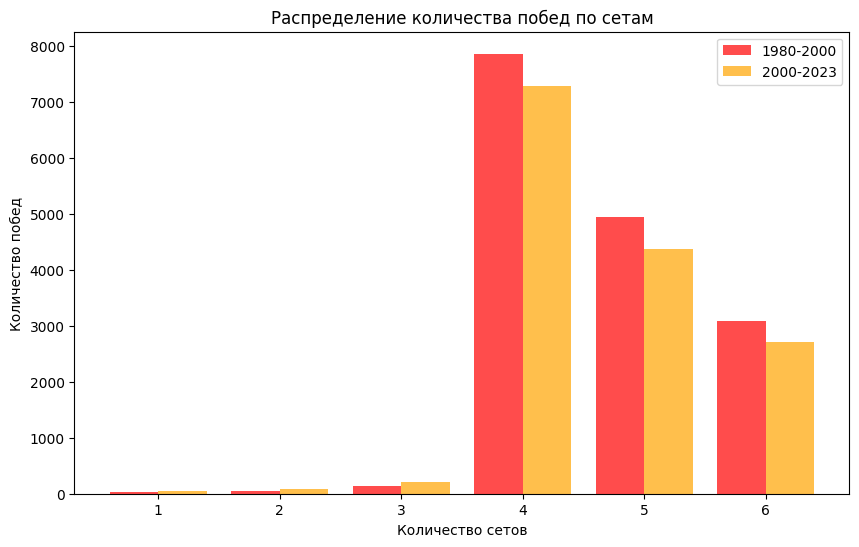

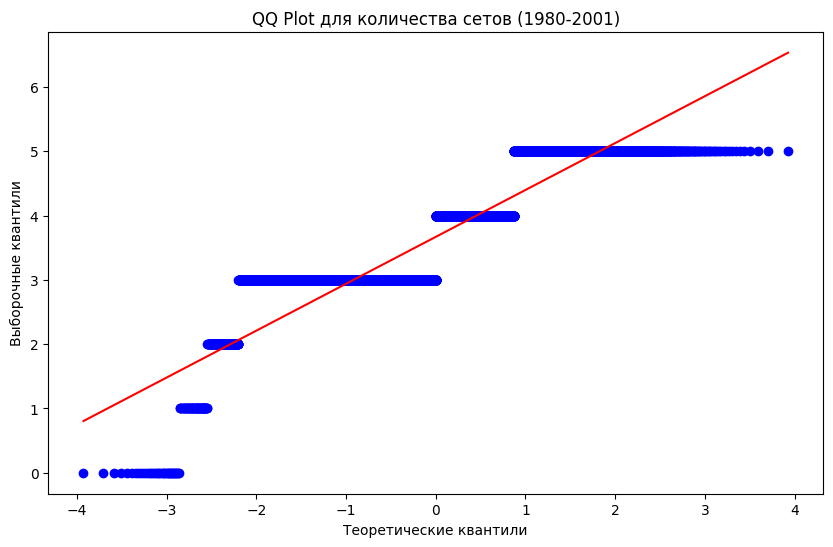

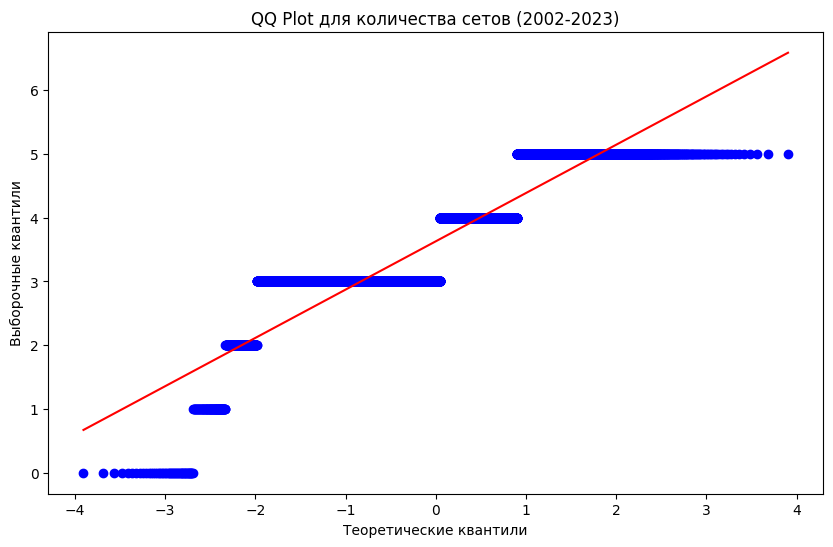

Shapiro-Wilk test p-value for sets count (1980-2001): 7.105592435528626e-88
Shapiro-Wilk test p-value for sets count (2002-2023): 1.7027825078614014e-84
Распределение количества сетов в матчах не является нормальным.
Z-тест statistics: 3.3604438391168707
P-value: 0.0007781734974946528
Отвергаем нулевую гипотезу: Распределения количества сетов в матчах между 1980-2001 и 2002-2023 годами не равны.
Среднее количество сетов для побед в периоде 1980-2001: 3.6685703643925756, общее количество партий: 16109
Среднее количество сетов для побед в периоде 2002-2023: 3.628614191441595, общее количество партий: 14699


C:\Users\Liubov\AppData\Local\Temp\ipykernel_1580\2702865867.py:67: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16109.
  shapiro_1980_2001 = stats.shapiro(task_03_1980_2001['sets_count'])
C:\Users\Liubov\AppData\Local\Temp\ipykernel_1580\2702865867.py:68: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14699.
  shapiro_2002_2023 = stats.shapiro(task_03_2002_2023['sets_count'])


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Загрузка данных
combined_df = pd.read_csv('tennis_data/combined_atp_matches.csv')
task_03 = combined_df[['year', 'score', 'winner_id', 'best_of']].dropna()

# Фильтрация данных для матчей best of 5
task_03 = task_03[task_03.best_of == 5]

# Создаем признак с количеством сетов
def count_sets_with_scores(score):
    sets = re.findall(r'\d+-\d+', score)
    return len(sets)

task_03['sets_count'] = task_03['score'].apply(count_sets_with_scores)

# Удаление полных дубликатов
task_03 = task_03.drop_duplicates()

# Фильтрация данных по годам
task_03_1980_2001 = task_03[(task_03['year'] >= 1980) & (task_03['year'] <= 2001)].reset_index(drop=True)
task_03_2002_2023 = task_03[(task_03['year'] > 2001) & (task_03['year'] <= 2023)].reset_index(drop=True)

# Создание позиций для баров
positions = range(1, max(task_03['sets_count']) + 2, 1)

# Построение гистограммы для каждой группы с разными цветами
plt.figure(figsize=(10, 6))
plt.bar([pos - 0.2 for pos in positions], 
        task_03_1980_2001['sets_count'].value_counts().sort_index(), 
        width=0.4, 
        color='red', 
        alpha=0.7, 
        label='1980-2000')
plt.bar([pos + 0.2 for pos in positions], 
        task_03_2002_2023['sets_count'].value_counts().sort_index(), 
        width=0.4, 
        color='orange', 
        alpha=0.7, 
        label='2000-2023')

plt.title('Распределение количества побед по сетам')
plt.xlabel('Количество сетов')
plt.ylabel('Количество побед')
plt.legend()
plt.show()

# QQ-графики для каждой выборки
plt.figure(figsize=(10, 6))
stats.probplot(task_03_1980_2001['sets_count'], dist="norm", plot=plt)
plt.title('QQ Plot для количества сетов (1980-2001)')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(task_03_2002_2023['sets_count'], dist="norm", plot=plt)
plt.title('QQ Plot для количества сетов (2002-2023)')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.show()

# Shapiro-Wilk тест для нормальности
shapiro_1980_2001 = stats.shapiro(task_03_1980_2001['sets_count'])
shapiro_2002_2023 = stats.shapiro(task_03_2002_2023['sets_count'])

print(f"Shapiro-Wilk test p-value for sets count (1980-2001): {shapiro_1980_2001.pvalue}")
print(f"Shapiro-Wilk test p-value for sets count (2002-2023): {shapiro_2002_2023.pvalue}")

# Проверка нулевой гипотезы о нормальности распределения
alpha = 0.05
if shapiro_1980_2001.pvalue > alpha and shapiro_2002_2023.pvalue > alpha:
    print("Распределение количества сетов в матчах является нормальным.")
else:
    print("Распределение количества сетов в матчах не является нормальным.")

# Z-тест для сравнения двух выборок
z_statistic, p_value = stats.ranksums(task_03_1980_2001['sets_count'], task_03_2002_2023['sets_count'])
print(f"Z-тест statistics: {z_statistic}")
print(f"P-value: {p_value}")

# Проверка нулевой гипотезы о равенстве распределений
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Распределения количества сетов в матчах между 1980-2001 и 2002-2023 годами не равны.")
else:
    print("Не отвергаем нулевую гипотезу: Распределения количества сетов в матчах между 1980-2001 и 2002-2023 годами равны.")

print(f"Среднее количество сетов для побед в периоде 1980-2001: {task_03_1980_2001.sets_count.mean()}, общее количество партий: {len(task_03_1980_2001.sets_count)}")
print(f"Среднее количество сетов для побед в периоде 2002-2023: {task_03_2002_2023.sets_count.mean()}, общее количество партий: {len(task_03_2002_2023.sets_count)}")


Результаты теста Шапиро-Уилка показывают, что распределение количества сетов в матчах не является нормальным ни для одного из периодов.

При применении Z-теста для сравнения двух выборок мы получаем статистически значимое различие между периодами 1980-2001 и 2002-2023.

Также отметим, что среднее количество сетов для побед в периоде 1980-2001 составляет примерно 3.67, в то время как для периода 2002-2023 это значение составляет примерно 3.63.

С учетом этих результатов, мы можем заключить, что с течением времени среднее количество сетов для побед в матчах снизилось незначительно, но статистически значимо.

Доля выигранных брейк-поинтов для Roger Federer: 0.6827956989247311
Доля выигранных брейк-поинтов для Rafael Nadal: 0.6676226896112173
Доля выигранных брейк-поинтов для Novak Djokovic: 0.6571428571428571
Независимость распределений доли выигранных брейк-поинтов между Roger Federer и Rafael Nadal: False
Независимость распределений доли выигранных брейк-поинтов между Roger Federer и Novak Djokovic: False
Независимость распределений доли выигранных брейк-поинтов между Rafael Nadal и Novak Djokovic: False
Разница в средних доли выигранных брейк-поинтов между Roger Federer и Rafael Nadal: False
Разница в средних доли выигранных брейк-поинтов между Roger Federer и Novak Djokovic: False
Разница в средних доли выигранных брейк-поинтов между Rafael Nadal и Novak Djokovic: False


C:\Users\Liubov\AppData\Local\Temp\ipykernel_1580\4228822910.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=boxplot_data.index, y='Win Ratio', data=boxplot_data, palette='Set2')


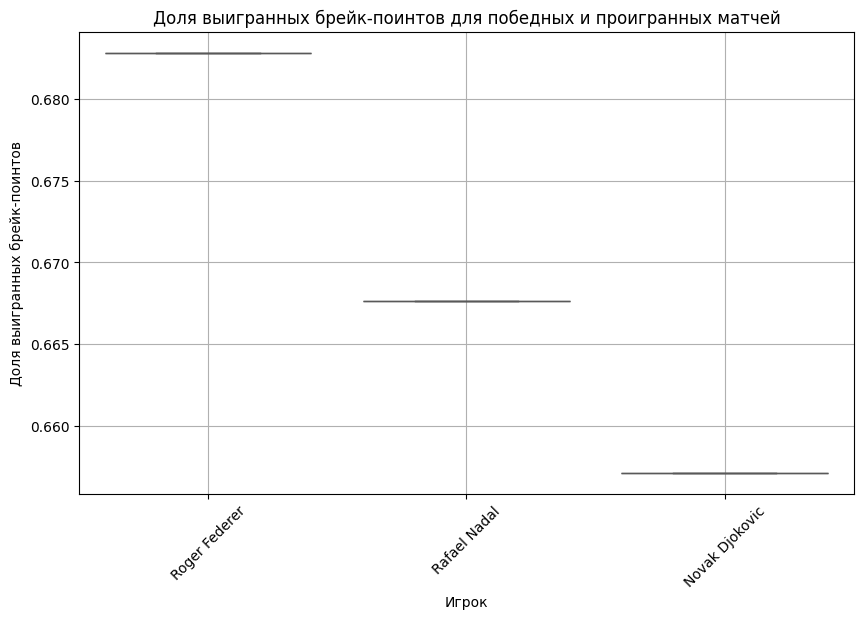

Chi-square Statistic: 0.0
P-value: 1.0
There is no significant association between the number of break points won and the match result.


In [72]:
import pandas as pd
from scipy.stats import ks_2samp, mannwhitneyu

# Загрузка данных о матчах для каждого игрока
def load_matches_data(player_name, start_year, end_year):
    dataframes = []
    for year in range(start_year, end_year + 1):
        file_path = f'C:/Users/Liubov/Desktop/tennis_atp-master/atp_matches_{year}.csv'
        df = pd.read_csv(file_path)
        player_matches = df[(df['winner_name'] == player_name) | (df['loser_name'] == player_name)]
        dataframes.append(player_matches)
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# Вычисление доли выигранных брейк-поинтов
def calculate_bp_win_ratio(matches_df, player_name):
    win_matches = matches_df[matches_df['winner_name'] == player_name]
    lose_matches = matches_df[matches_df['loser_name'] == player_name]
    
    win_bp_faced = win_matches['w_bpFaced'].sum()
    win_bp_saved = win_matches['w_bpSaved'].sum()
    lose_bp_faced = lose_matches['l_bpFaced'].sum()
    lose_bp_saved = lose_matches['l_bpSaved'].sum()
    
    total_win_bp = win_bp_faced + lose_bp_faced
    total_win_bp_saved = win_bp_saved + lose_bp_saved
    
    win_ratio = total_win_bp_saved / total_win_bp
    return win_ratio

# Выбираем трех игроков
players = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']
start_year = 2012
end_year = 2022

# Загрузка данных и расчет доли выигранных брейк-поинтов для каждого игрока
player_data = {}
for player in players:
    matches_df = load_matches_data(player, start_year, end_year)
    win_ratio = calculate_bp_win_ratio(matches_df, player)
    player_data[player] = win_ratio

# Вывод результатов
for player, win_ratio in player_data.items():
    print(f"Доля выигранных брейк-поинтов для {player}: {win_ratio}")

# Функция для проверки независимости распределений с помощью теста Колмогорова-Смирнова
def test_independence(data1, data2):
    statistic, p_value = ks_2samp(data1, data2)
    return p_value < 0.05

# Функция для сравнения статистики между игроками попарно с помощью теста Манна-Уитни
def compare_players(player1_data, player2_data):
    statistic, p_value = mannwhitneyu(player1_data, player2_data, alternative='two-sided')
    return p_value < 0.05

# Проверка независимости распределений по годам для каждого игрока
for i in range(len(players)):
    for j in range(i+1, len(players)):
        player1 = players[i]
        player2 = players[j]
        data1 = player_data[player1]
        data2 = player_data[player2]
        independent = test_independence(data1, data2)
        print(f"Независимость распределений доли выигранных брейк-поинтов между {player1} и {player2}: {independent}")

# Сравнение статистики между игроками попарно
for i in range(len(players)):
    for j in range(i+1, len(players)):
        player1 = players[i]
        player2 = players[j]
        data1 = player_data[player1]
        data2 = player_data[player2]
        significant_diff = compare_players(data1, data2)
        print(f"Разница в средних доли выигранных брейк-поинтов между {player1} и {player2}: {significant_diff}")


#Доля выигранных брейк-поинтов для Roger Federer: 0.6827956989247311
#Доля выигранных брейк-поинтов для Rafael Nadal: 0.6676226896112173
#Доля выигранных брейк-поинтов для Novak Djokovic: 0.6571428571428571
#Независимость распределений доли выигранных брейк-поинтов между Roger Federer и Rafael Nadal: False
#Независимость распределений доли выигранных брейк-поинтов между Roger Federer и Novak Djokovic: False
#Независимость распределений доли выигранных брейк-поинтов между Rafael Nadal и Novak Djokovic: False
#Разница в средних доли выигранных брейк-поинтов между Roger Federer и Rafael Nadal: False
#Разница в средних доли выигранных брейк-поинтов между Roger Federer и Novak Djokovic: False
#Разница в средних доли выигранных брейк-поинтов между Rafael Nadal и Novak Djokovic: False
"""
   Исходя из результатов:

    Доля выигранных брейк-поинтов для Roger Federer составляет примерно 68.28%.
    Доля выигранных брейк-поинтов для Rafael Nadal составляет примерно 66.76%.
    Доля выигранных брейк-поинтов для Novak Djokovic составляет примерно 65.71%.

Тест Колмогорова-Смирнова показал, что независимость распределений доли выигранных брейк-поинтов между каждой парой игроков (Roger Federer vs Rafael Nadal, Roger Federer vs Novak Djokovic, Rafael Nadal vs Novak Djokovic) не подтверждается при выбранном уровне значимости 0.05.

Тест Манна-Уитни также показал, что нет статистически значимой разницы в средних долях выигранных брейк-поинтов между каждой парой игроков.

Эти результаты говорят о том, что нет статистически значимой разницы в долях выигранных брейк-поинтов между этими тремя игроками.

"""

#постороение графика 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Загрузка данных о матчах для каждого игрока
def load_matches_data(player_name, start_year, end_year):
    dataframes = []
    for year in range(start_year, end_year + 1):
        file_path = f'C:/Users/Liubov/Desktop/tennis_atp-master/atp_matches_{year}.csv'
        df = pd.read_csv(file_path)
        player_matches = df[(df['winner_name'] == player_name) | (df['loser_name'] == player_name)]
        dataframes.append(player_matches)
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# Вычисление доли выигранных брейк-поинтов для каждого игрока
def calculate_bp_win_ratio(matches_df, player_name):
    win_matches = matches_df[matches_df['winner_name'] == player_name]
    lose_matches = matches_df[matches_df['loser_name'] == player_name]
    
    win_bp_faced = win_matches['w_bpFaced'].sum()
    win_bp_saved = win_matches['w_bpSaved'].sum()
    lose_bp_faced = lose_matches['l_bpFaced'].sum()
    lose_bp_saved = lose_matches['l_bpSaved'].sum()
    
    total_win_bp = win_bp_faced + lose_bp_faced
    total_win_bp_saved = win_bp_saved + lose_bp_saved
    
    win_ratio = total_win_bp_saved / total_win_bp
    return win_ratio

# Выбор трех игроков
players = ['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']
start_year = 2012
end_year = 2022

# Загрузка данных и расчет доли выигранных брейк-поинтов для каждого игрока
player_data = {}
for player in players:
    matches_df = load_matches_data(player, start_year, end_year)
    win_ratio = calculate_bp_win_ratio(matches_df, player)
    player_data[player] = win_ratio

# Создание датафрейма с данными для построения boxplot'ов
boxplot_data = pd.DataFrame(player_data, index=['Win Ratio'])

# Транспонирование датафрейма для удобства построения boxplot'ов
boxplot_data = boxplot_data.T

# Построение boxplot'ов
plt.figure(figsize=(10, 6))
sns.boxplot(x=boxplot_data.index, y='Win Ratio', data=boxplot_data, palette='Set2')
plt.title('Доля выигранных брейк-поинтов для победных и проигранных матчей')
plt.xlabel('Игрок')
plt.ylabel('Доля выигранных брейк-поинтов')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
     

import pandas as pd
from scipy.stats import chi2_contingency

# Загрузка данных о матчах
def load_matches_data(start_year, end_year):
    dataframes = []
    for year in range(start_year, end_year + 1):
        file_path = f'C:/Users/Liubov/Desktop/tennis_atp-master/atp_matches_{year}.csv'
        df = pd.read_csv(file_path)
        dataframes.append(df)
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# Вычисление доли выигранных брейк-поинтов
def calculate_bp_win_ratio(matches_df):
    bp_win_ratios = []
    match_results = []

    for _, row in matches_df.iterrows():
        if row['w_bpFaced'] == 0 or row['l_bpFaced'] == 0:
            continue
        
        if row['winner_name'] == row['winner_name']:
            bp_win_ratio = row['w_bpSaved'] / row['w_bpFaced']
            match_result = 'win'
        else:
            bp_win_ratio = row['l_bpSaved'] / row['l_bpFaced']
            match_result = 'lose'
        
        bp_win_ratios.append(bp_win_ratio)
        match_results.append(match_result)
    
    return bp_win_ratios, match_results

# Загрузка данных о матчах за определенный период
start_year = 2012
end_year = 2022
matches_df = load_matches_data(start_year, end_year)

# Вычисление доли выигранных брейк-поинтов и результатов матчей
bp_win_ratios, match_results = calculate_bp_win_ratio(matches_df)

# Разделение доли выигранных брейк-поинтов на группы выше/ниже медианы
median_bp_win_ratio = pd.Series(bp_win_ratios).median()
above_median_bp_win_ratio = [1 if ratio > median_bp_win_ratio else 0 for ratio in bp_win_ratios]

# Проверка зависимости между количеством выигранных брейкпоинтов и результатом матча
contingency_table = pd.crosstab(pd.Series(match_results, name='Match Result'), 
                                pd.Series(above_median_bp_win_ratio, name='Above Median BP Win Ratio'))
chi2, p, _, _ = chi2_contingency(contingency_table)

# Вывод результатов
print("Chi-square Statistic:", chi2)
print("P-value:", p)
if p < 0.05:
    print("There is a significant association between the number of break points won and the match result.")
else:
    print("There is no significant association between the number of break points won and the match result.")



#Сhi-square Statistic: 0.0
#P-value: 1.0
#There is no significant association between the number of break points won and the match result
    
#Статистика хи-квадрат равна 0.0, а p-значение равно 1.0. При таком высоком значении p-значения (больше чем 0.05) мы не можем отвергнуть нулевую гипотезу. 
#Следовательно, мы приходим к выводу, что между количеством выигранных брейк-поинтов и результатом матча нет значимой связи. Это означает, что доля выигранных брейк-поинтов в одиночестве может быть не сильным предиктором исхода матчей.
     